# TUGAS KECIL 2 IF-3170 Inteligensi Buatan

    Renjira Naufhal Dhiaegana  13516014
    Intan Nurjannah            13516131

## 1. Membaca dataset iris dan play-tennis

###    1.1 Membaca dataset iris

In [20]:
from sklearn import datasets

iris_data = datasets.load_iris()

    
print(iris_data.DESCR+"\n")
print(iris_data.feature_names)
print(iris_data.data)
print(iris_data.target_names)
print(iris_data.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 1.2 Membaca dataset play-tennis(.csv)

In [21]:
import pandas

tennis_data = pandas.read_csv('weather.nominal.csv')

tennis_data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## 2. Melakukan Pembelajaran (pada dataset iris)

### 2.1 Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB as NB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier as MLP
import matplotlib.pyplot as plt

X = iris_data.data
Y = iris_data.target
gnb = NB()
gnb.fit(X,Y)
iris_pred = gnb.predict(X)
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

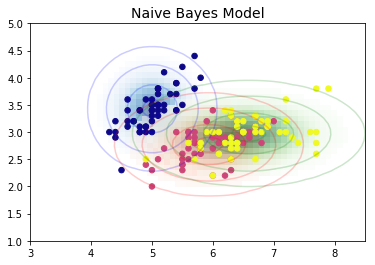

In [87]:

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap='plasma')
ax.set_title('Naive Bayes Model', size=14)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'red','green']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)


### 2.2 Decision Tree

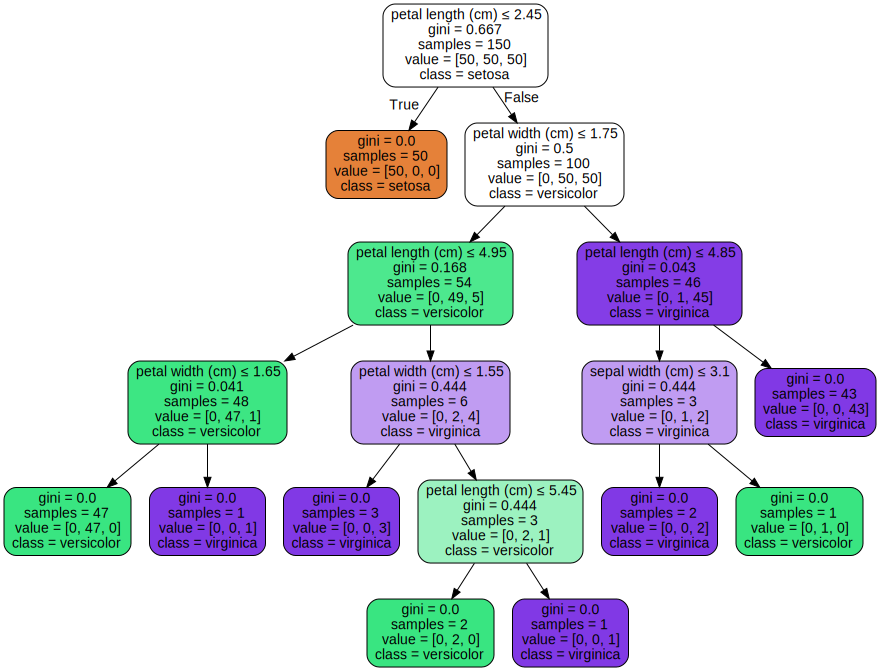

In [23]:
import graphviz
dtree = tree.DecisionTreeClassifier()
dtree.fit(iris_data.data, iris_data.target)

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=iris_data.feature_names,  
                         class_names=iris_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


### 2.3 K-Nearest Neighbor

In [24]:
knn = KNN()
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

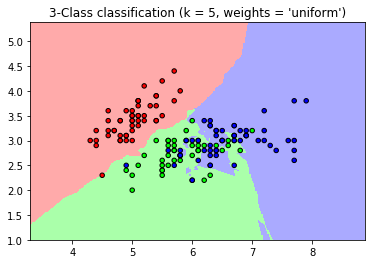

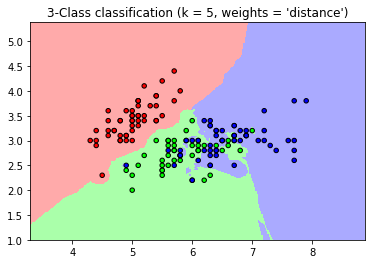

In [25]:
from matplotlib.colors import ListedColormap
import numpy as np
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02
n_neighbors = 5
X = iris_data.data[:, :2]

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNN(n_neighbors, weights=weights)
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### 2.4 Multilayer Perceptron

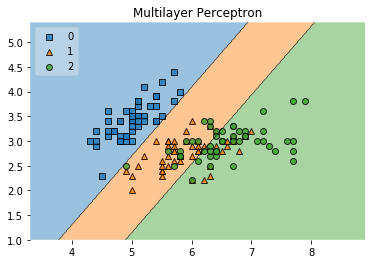

In [26]:
mlp = MLP(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
mlp.fit(X,Y)

from mlxtend.plotting import plot_decision_regions

fig = plot_decision_regions(X=X, y=Y, clf=mlp, legend=2)
plt.title('Multilayer Perceptron')
plt.show()

## 3. Melakukan pembelajaran dengan split train 90:10

In [58]:
import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def perfMeasure(name, y_test,y_pred):
    print(name, "performance measure: ")
    print("- NB accuracy:",accuracy_score(y_pred=iris_pred,y_true=Y))
    print("- NB precision:",precision_score(y_pred=iris_pred,y_true=Y,average='micro'))
    print("- NB recall",recall_score(y_pred=iris_pred,y_true=Y,average='micro'))
    plt.figure
    plot_confusion_matrix(confusion_matrix(y_test, y_pred),iris.target_names,name)
    plt.show


### 3.1 Naive Bayes

NaiveBayes performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
[[10  0  0]
 [ 0 12  2]
 [ 0  1 13]]


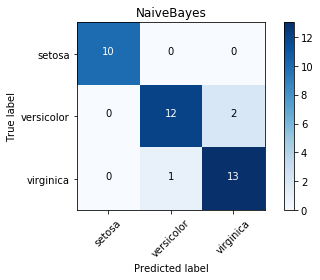

In [73]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

X_train90, X_test90, y_train90, y_test90 = train_test_split(X,y)

gnb90 = NB()
gnb90.fit(X_train90, y_train90)


perfMeasure('NaiveBayes',y_test90, gnb90.predict(X_test90))


### 3.2 Decision Tree

DecisionTree performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
[[10  0  0]
 [ 0 10  1]
 [ 0  0 17]]


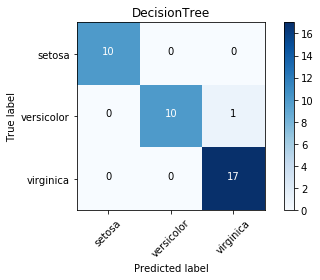

In [68]:
dt90 = tree.DecisionTreeClassifier()
dt90.fit(X_train90,y_train90)

perfMeasure('DecisionTree', y_test90, dt90.predict(X_test90))

### 3.3 kNN

k-NearestNeighbor performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
[[10  0  0]
 [ 0 12  2]
 [ 0  1 13]]


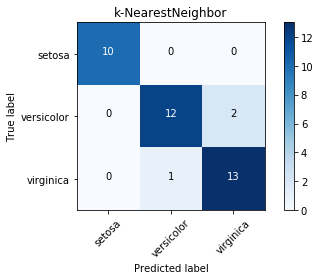

In [75]:
knn90 = KNN(n_neighbors=1)
knn90.fit(X_train90,y_train90)

perfMeasure('k-NearestNeighbor', y_test90, knn90.predict(X_test90))

### 3.4 MLP

k-NearestNeighbor performance measure: 
- NB accuracy: 0.96
- NB precision: 0.96
- NB recall 0.96
[[10  0  0]
 [ 0 12  2]
 [ 0  1 13]]


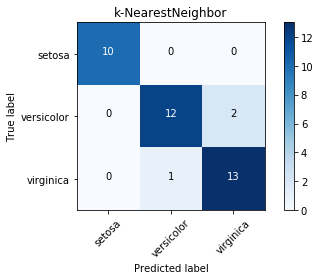

In [77]:
mlp90 = MLP(max_iter=100000)
mlp90.fit(X_train90, y_train90)

perfMeasure('k-NearestNeighbor', y_test90, knn90.predict(X_test90))